Question 1:
Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Prevalence of underweight, weight for age (% of children under 5)."
What kind of relationship do you expect? 
Make a scatter plot of malnutrition prevalence against GDP per capita (using all available years and countries). 
What kind of relationship do you see? Make a scatter plot for the geographical regions (six regions excluding North
America and use a different color for each).
Make a scatter plot for income levels (four income levels and use a different color for each).
Carefully label all graphs and provide legends.

TypeError: 'str' object is not callable

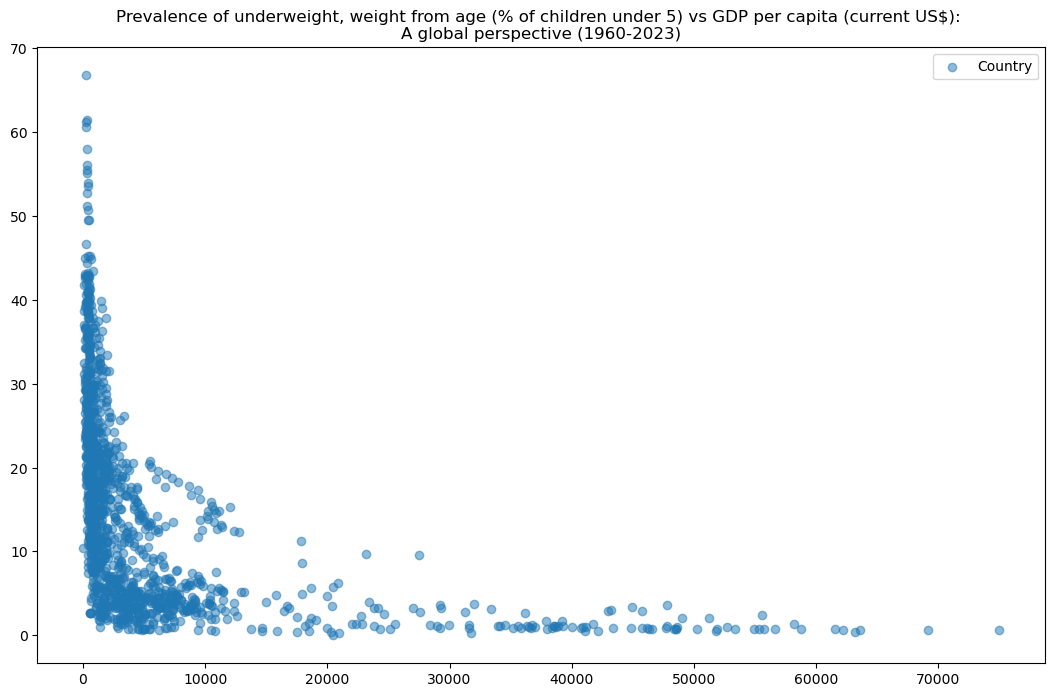

In [44]:
# to use read_excel function
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# storing data from data source into respective data frames (both metadata and original data) 
gdp_data_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Data', skiprows=3)
gdp_metad_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Metadata - Countries', usecols="A,B,C")

mal_data_df = pd.read_excel('data/Prevalence_of_underweight,_weight_for_age.xls', sheet_name="Data", skiprows=3)
mal_metad_df = pd.read_excel('data/Prevalence_of_underweight,_weight_for_age.xls', sheet_name="Metadata - Countries", usecols="A,B,C")

# dropping the columns we don't need before we merge 
gdp_data_filtered = gdp_data_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
# translating the dataframe from wide to long format so we can carry out further analysis and plot graphs
gdp_long_data_df = gdp_data_filtered.melt(id_vars='Country Code', var_name="Year", value_name="gdp")


# droping the columns we don't need before we merge 
mal_data_filtered = mal_data_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
# translating the dataframe from wide to long format so we can carry out further analysis and plot graphs
mal_long_data_df = mal_data_filtered.melt(id_vars='Country Code', var_name='Year', value_name='mal')

# merging the long dataframe with the metadata so we can have key columns in the same dataframe before me merge them together
merged_gdp_df = pd.merge(gdp_long_data_df,gdp_metad_df, on='Country Code')
merged_mal_df = pd.merge(mal_long_data_df,mal_metad_df, on='Country Code')

# merging the two data frames on matching columns
merged_df = pd.merge(merged_gdp_df, merged_mal_df, on=['Country Code', 'Region', 'Year','IncomeGroup'])

# graph configuration
plt.figure(figsize=(13,8))
plt.scatter(merged_df['gdp'], merged_df['mal'], alpha=0.5, label="Country")
plt.legend()
plt.title("Prevalence of underweight, weight from age (% of children under 5) vs GDP per capita (current US$): \nA global perspective (1960-2023)")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()




# filter the dataframe excluding the North American region 
geo_filtered_df = merged_df[~merged_df['Region'].isin(['North America'])]
# using color map to get us unique colors for the unique geographical locations
unique_geos = geo_filtered_df['Region'].unique()
geo_colors = plt.cm.get_cmap('tab10', len(unique_geos))
# get a unique color for each geographical location store it in a dictionary
geo_color_map = {geoloc: geo_colors(i) for i, geoloc in enumerate(unique_geos)}

# graph configuration
plt.figure(figsize=(13,8))
for geo_loc in unique_geos:
    # searching the main dataframe for the current geographical region
    geo_data = merged_df[merged_df['Region'] == geo_loc]
    # plot the geographical region on the graph
    plt.scatter(geo_data['gdp'], geo_data['mal'], color=geo_color_map[geo_loc],label=geo_loc )
plt.legend()
plt.title("Correlation Prevalence of underweight, weight from age (% of children under 5) \nand GDP per capita (current US$) by geographical region excluding North America")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()


# using color map to get us unique colors for the unique income levels
unique_ilevels = merged_df['IncomeGroup'].unique()
# get a unique list of colors based on the number of unique income groups found
ilevel_colors = plt.cm.get_cmap('tab10', len(unique_ilevels))
# get a unique color for each income level store it in a dictionary
ilevel_color_map = {ilevel: ilevel_colors(i) for i, ilevel in enumerate(unique_ilevels)}

# graph configuration
plt.figure(figsize=(13,8))
for income_level in unique_ilevels:
    # searching the main dataframe for the current incomelevel
    ilevel_data = merged_df[merged_df['IncomeGroup'] == income_level]
    # plot the income level on the graph
    plt.scatter(ilevel_data['gdp'], ilevel_data['mal'], color=ilevel_color_map[income_level],label=income_level )
plt.legend()
plt.title("Correlation Prevalence of underweight, weight from age (% of children under 5) \nand GDP per capita (current US$) by income level")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()


            Wheat_price  Oil_price  Gold_price
Date                                          
1980-12-31   182.616028   0.000000       589.5
1981-12-31   176.002167   0.000000       400.0
1982-12-31   159.834961  32.766667       448.0
1984-12-31   149.546738  29.377500       309.0
1985-12-31   137.053879  27.762500       327.0
            Wheat_price  Oil_price  Gold_price
Date                                          
2010-12-31   274.456818  79.425531     1410.25
2012-12-31   303.038556  94.158878     1664.00
2013-12-31   246.112579  97.942766     1201.50
2014-12-31   234.858837  93.112500     1199.25
2015-12-31   163.893455  48.709167     1062.25
2007-12-31 00:00:00
2008-12-31 00:00:00
2012-12-31 00:00:00


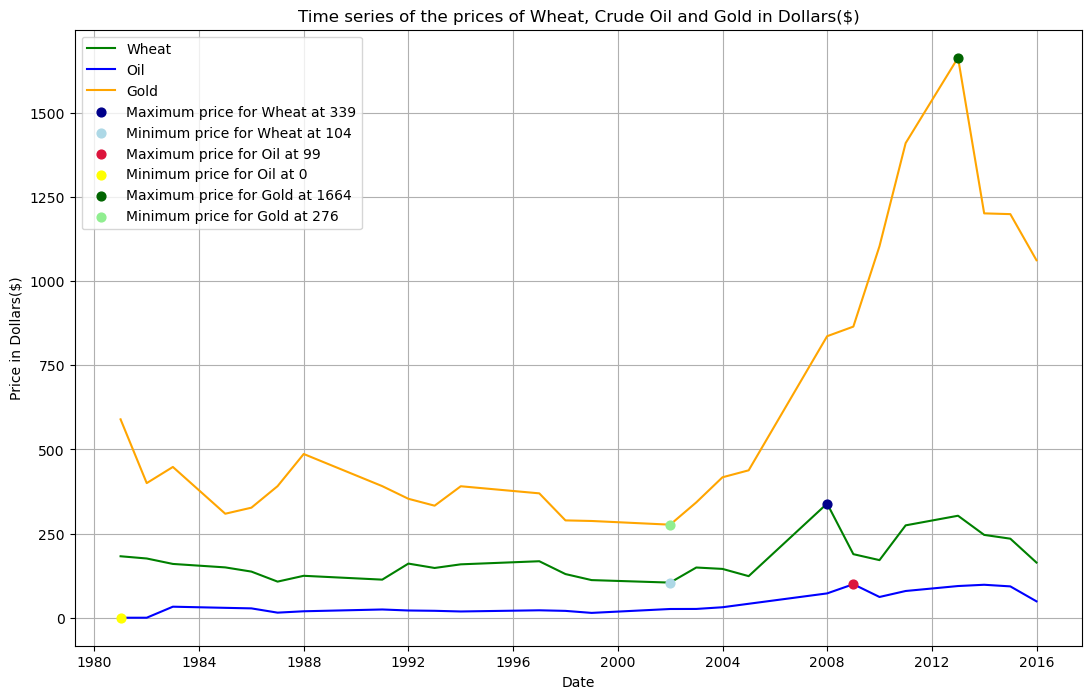

In [29]:
# to get datasets from quandl
import quandl as qdl
# to utilize the plot function 
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# providing api key to allow connections to quandl
qdl.ApiConfig.api_key = 'HQ2ZhGd-MqudXq7ZYiGq'

# specifying the exact datasets to receive from quandl
wheat_prices = qdl.get('COM/PWHEAMT_USD')
oil_prices = qdl.get('WGEC/WLD_CRUDE_WTI')
gold_prices = qdl.get('BUNDESBANK/BBK01_WT5511')

# synchronizing the dates for the 3 datasets 
merged_prices = pd.merge(wheat_prices,oil_prices, on=['Date'],suffixes=('_wheat','_oil'))
merged_prices = pd.merge(merged_prices, gold_prices, on=['Date'])

# replacing the auto generated column names with clear ones
merged_prices.rename(columns={'Value_wheat': 'Wheat_price', 'Value_oil':'Oil_price', 'Value':'Gold_price'}, inplace=True)

# configuring the time series graph
plt.figure(figsize=(13,8))
plt.plot(merged_prices.index, merged_prices['Wheat_price'], label="Wheat", color="green")
plt.plot(merged_prices.index, merged_prices['Oil_price'], label="Oil", color="blue")
plt.plot(merged_prices.index, merged_prices['Gold_price'], label="Gold", color="Orange")

# minimum and maximum colors to uniquely identify the maximum and minimum points for wheat, oil and gold
colors = {
    'Wheat_price': ['lightblue','darkblue'],
    'Oil_price': ['yellow','crimson'],
    'Gold_price': ['lightgreen','darkgreen']
}
# we use these alternative titles in the legend description 
clean_price_titles = {
    'Wheat_price': 'Wheat',
    'Oil_price': 'Oil',
    'Gold_price': 'Gold'
}
# interate through the columns to mark the highest and lowest points for each of them
for column in merged_prices.columns:
    max_value = merged_prices[column].max()
    max_index = merged_prices[column].idxmax()
    plt.scatter(max_index, max_value, color=colors[column][1], s=40, zorder=3, label=f'Maximum price for {clean_price_titles[column]} at {int(max_value)}')
    min_value = merged_prices[column].min()
    min_index = merged_prices[column].idxmin()
    plt.scatter(min_index, min_value, color=colors[column][0], s=40, zorder=3, label=f'Minimum price for {clean_price_titles[column]} at {int(min_value)}')

# graph configuration continued
plt.title("Time series of the prices of Wheat, Crude Oil and Gold in Dollars($)")
plt.xlabel('Date')
plt.ylabel('Price in Dollars($)')
plt.grid(True)
plt.legend()
plt.show()




In [ ]:
import pandas as pd

from tabulate import tabulate as tb

c02_df = pd.read_excel('data/C02_emissions.xls', sheet_name='Data', skiprows=3)

c02_filtered_df = c02_df.drop(columns=['Indicator Name', 'Indicator Code'])

c02_melted_df = c02_filtered_df.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='C02 Emission')

c02_summary = {
    "Statistic":['Mean', 'Median', 'Standard Deviation', '5th percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    "Country Value": [
        round(c02_melted_df['C02 Emission'].mean(),2),
        round(c02_melted_df['C02 Emission'].median(),2),
        round(c02_melted_df['C02 Emission'].std(),2),
        round(c02_melted_df['C02 Emission'].quantile(0.05),2),
        round(c02_melted_df['C02 Emission'].quantile(0.25),2),
        round(c02_melted_df['C02 Emission'].quantile(0.75),2),
        round(c02_melted_df['C02 Emission'].quantile(0.95),2)
    ]
}

c02_summary_df= pd.DataFrame(c02_summary)

print(tb(c02_summary_df, headers='keys', tablefmt='pretty'))


school_df = pd.read_excel('data/school_enrollment.xls', sheet_name='Data', skiprows=3)

school_filtered_df = school_df.drop(columns=['Indicator Name', 'Indicator Code'])

school_melted_df = school_filtered_df.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='C02 Emission')

school_stats_summary = {
    "Statistic":['Mean', 'Median', 'Standard Deviation', '5th percentile', '25th Percentile', '75th Percentile', '95th Percentile'],
    "Country Value": [
        round(school_melted_df['C02 Emission'].mean(),2),
        round(school_melted_df['C02 Emission'].median(),2),
        round(school_melted_df['C02 Emission'].std(),2),
        round(school_melted_df['C02 Emission'].quantile(0.05),2),
        round(school_melted_df['C02 Emission'].quantile(0.25),2),
        round(school_melted_df['C02 Emission'].quantile(0.75),2),
        round(school_melted_df['C02 Emission'].quantile(0.95),2)
    ]
}

school_stats_summary_df= pd.DataFrame(school_stats_summary)

print(tb(school_stats_summary_df, headers='keys', tablefmt='pretty'))

+---+--------------------+---------------+
|   |     Statistic      | Country Value |
+---+--------------------+---------------+
| 0 |        Mean        |     4.24      |
| 1 |       Median       |      2.4      |
| 2 | Standard Deviation |     5.21      |
| 3 |   5th percentile   |     0.09      |
| 4 |  25th Percentile   |     0.68      |
| 5 |  75th Percentile   |     6.27      |
| 6 |  95th Percentile   |     13.72     |
+---+--------------------+---------------+
+---+--------------------+---------------+
|   |     Statistic      | Country Value |
+---+--------------------+---------------+
| 0 |        Mean        |     83.79     |
| 1 |       Median       |     90.31     |
| 2 | Standard Deviation |     16.69     |
| 3 |   5th percentile   |     49.19     |
| 4 |  25th Percentile   |     77.35     |
| 5 |  75th Percentile   |     95.46     |
| 6 |  95th Percentile   |     99.05     |
+---+--------------------+---------------+


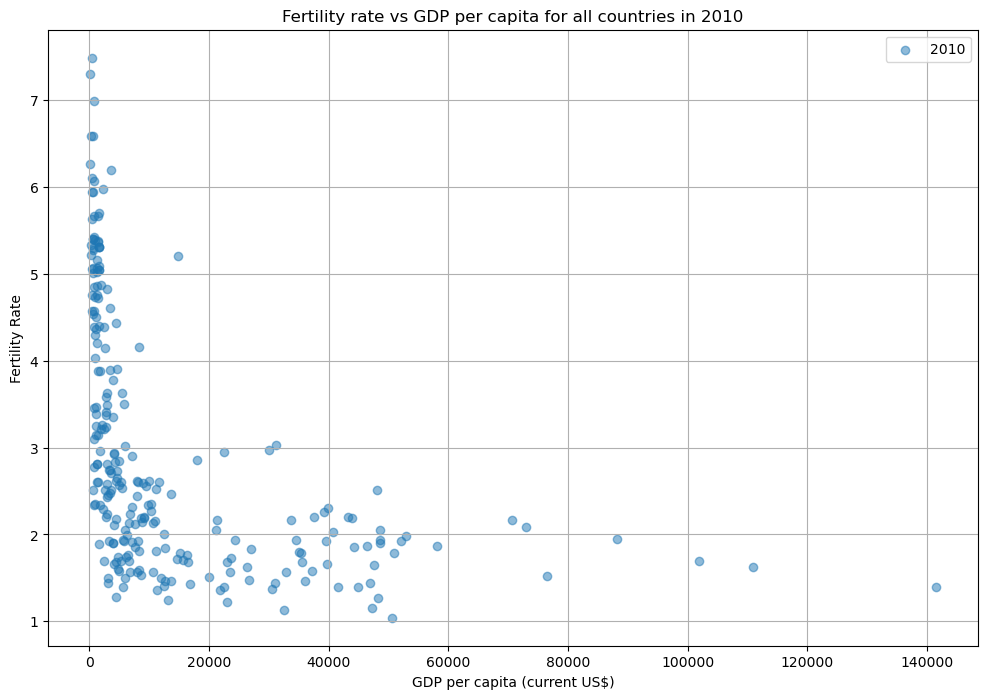

C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_16236\1447755992.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgdp_filtered["Cummulative Fertility Rate"] = fgdp_filtered['Fertility'].cumsum()
C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_16236\1447755992.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgdp_filtered['CDF'] = fgdp_filtered['Cummulative Fertility Rate']/total_cum


IndexError: index 0 is out of bounds for axis 0 with size 0

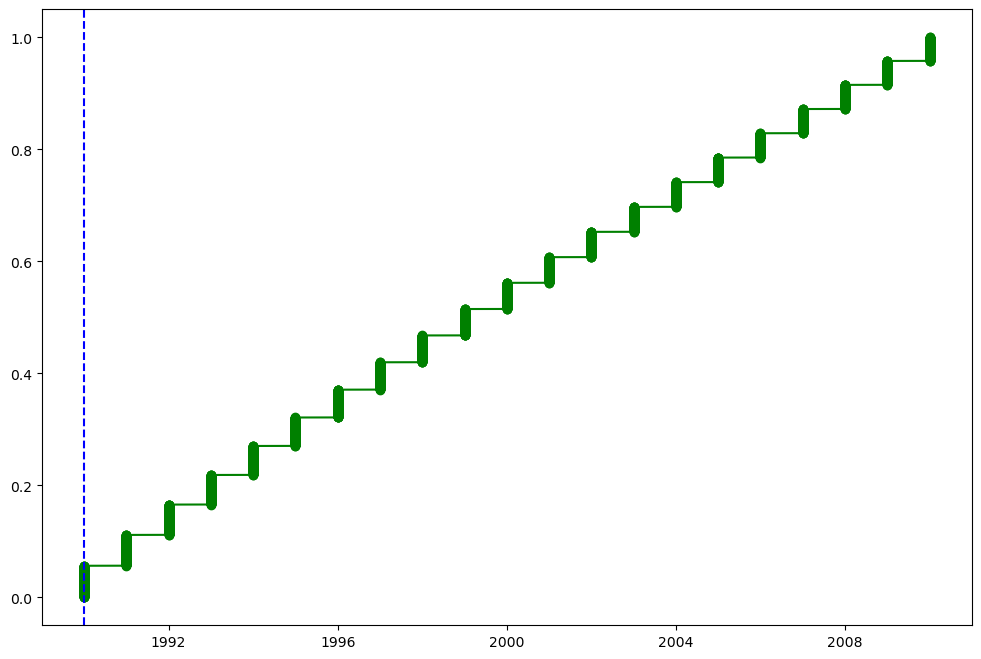

In [10]:
import pandas as pd

import matplotlib.pyplot as plt

fertility_rate_df = pd.read_excel('data/fertility_rate.xls', sheet_name='Data', skiprows=3)
gdp_data_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Data', skiprows=3)

fertility_rate_df_filtered = fertility_rate_df.drop(columns=['Indicator Name','Country Name', 'Indicator Code'])
fertility_rate_df_melted = fertility_rate_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='Fertility')

gdp_data_df_filtered = gdp_data_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name'])
gdp_data_df_melted = gdp_data_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='GDP')

fertility_gdp_df = pd.merge(fertility_rate_df_melted, gdp_data_df_melted, on=['Year', 'Country Code'])

fertility_gdp_df['Year'] = pd.to_datetime(fertility_gdp_df['Year'])

fertility_gdp_df_2010 = fertility_gdp_df[fertility_gdp_df['Year'].dt.year==2010]

plt.figure(figsize=(12,8))
plt.scatter(fertility_gdp_df_2010['GDP'], fertility_gdp_df_2010['Fertility'], alpha=0.5, label='2010')
plt.title("Fertility rate vs GDP per capita for all countries in 2010")
plt.ylabel("Fertility Rate")
plt.xlabel("GDP per capita (current US$)")
plt.grid(True)
plt.legend()
plt.show()


fgdp_filtered  = fertility_gdp_df[(fertility_gdp_df['Year'].dt.year >= 1990) & (fertility_gdp_df['Year'].dt.year <= 2010)]
fgdp_filtered["Cummulative Fertility Rate"] = fgdp_filtered['Fertility'].cumsum()

total_cum = fgdp_filtered['Cummulative Fertility Rate'].iloc[-1]
fgdp_filtered['CDF'] = fgdp_filtered['Cummulative Fertility Rate']/total_cum

median_fertililty_rate = fgdp_filtered['Fertility'].median()
mean_fertility_rate = fgdp_filtered['Fertility'].mean()

mean_gdp_rate = fgdp_filtered['GDP'].median();
median_gdp_rate = fgdp_filtered['GDP'].mean();


plt.figure(figsize=(12,8))
plt.plot(fgdp_filtered['Year'], fgdp_filtered['CDF'], marker='o', color='green')
plt.axvline(x=fgdp_filtered.loc[fgdp_filtered['Fertility'] == median_fertililty_rate, 'Year'].values[0], color='blue', linestyle='--', label='Median Fertility Rate')
plt.axvline(x=fgdp_filtered.loc[fgdp_filtered['GDP']==median_gdp_rate, 'Year'].values[0], color='cyan', linestyle='--', label="Median GDP Rate")
plt.text(fgdp_filtered.loc[fgdp_filtered['Fertility']==median_fertililty_rate, 'Year'].values[0],0.5, f'Median: {median_fertililty_rate}', color='blue', verticalalignment='bottom')
plt.show()









In [24]:
import pandas as pd

import matplotlib.pyplot as plt

cpi_df = pd.read_excel('data/CPI_results.xlsx', sheet_name='CPI 2015-2016', usecols='A,B,C,F')
hpi_df  = pd.read_excel('data/hpi-data.xlsx', sheet_name='Rank order', usecols='B,C,J', skiprows=6)

hpi_cpi_df = pd.merge(hpi_df, cpi_df,on=['Country'])

plt.figure(figsize=(12,8))
plt.title("")

print(hpi_cpi_df)



c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


     HPI Rank     Country  Happy Planet Index WB Code  CPI2016  CPI 2016 Rank
0           1  Costa Rica           44.714071     CRI       58             41
1           2      Mexico           40.697292     MEX       30            123
2           3    Colombia           40.695011     COL       37             90
3           5     Vietnam           40.307589     VNM       33            113
4           6      Panama           39.502577     PAN       38             87
..        ...         ...                 ...     ...      ...            ...
127       136    Mongolia           14.269471     MNG       38             87
128       137       Benin           13.422365     BEN       36             95
129       138        Togo           13.233269     TGO       32            116
130       139  Luxembourg           13.151174     LUX       81             10
131       140        Chad           12.777156     TCD       20            159

[132 rows x 6 columns]
